# Importing the csv file

In [1]:
import pandas as pd

# Load labels from Excel file
Directory = r"C:\Users\pasin\Downloads\Skin diseases 500.csv"
labels_df = pd.read_csv(Directory)
image_ids = labels_df['image_id'].tolist()
cancer_types = labels_df['dx'].tolist()


# defining the path for the image dataset

In [2]:
# Preprocess the image filenames
image_folder = "C:/Users/pasin/Documents/IIT/FYP/Skin Cancer Detection cnn/2024 Train/All dermnet/"

image_paths = [image_folder + image_id  for image_id in image_ids]


In [3]:
image_paths

['C:/Users/pasin/Documents/IIT/FYP/Skin Cancer Detection cnn/2024 Train/All dermnet/acne-cystic-93.jpg',
 'C:/Users/pasin/Documents/IIT/FYP/Skin Cancer Detection cnn/2024 Train/All dermnet/acne-pustular-64.jpg',
 'C:/Users/pasin/Documents/IIT/FYP/Skin Cancer Detection cnn/2024 Train/All dermnet/acne-cystic-56.jpg',
 'C:/Users/pasin/Documents/IIT/FYP/Skin Cancer Detection cnn/2024 Train/All dermnet/acne-closed-comedo-2.jpg',
 'C:/Users/pasin/Documents/IIT/FYP/Skin Cancer Detection cnn/2024 Train/All dermnet/acne-cystic-97.jpg',
 'C:/Users/pasin/Documents/IIT/FYP/Skin Cancer Detection cnn/2024 Train/All dermnet/acne-cystic-32.jpg',
 'C:/Users/pasin/Documents/IIT/FYP/Skin Cancer Detection cnn/2024 Train/All dermnet/acne-pustular-72.jpg',
 'C:/Users/pasin/Documents/IIT/FYP/Skin Cancer Detection cnn/2024 Train/All dermnet/acne-closed-comedo-7.jpg',
 'C:/Users/pasin/Documents/IIT/FYP/Skin Cancer Detection cnn/2024 Train/All dermnet/acne-cystic-93.jpg',
 'C:/Users/pasin/Documents/IIT/FYP/Skin

In [4]:
cancer_types

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


# Loading the data and preprocessing it, and populating the X and Y arrays

In [5]:
# Load and preprocess the images
import cv2
import numpy as np

In [6]:
# Define the image size
image_size = (200, 200)

# Create empty arrays for X and Y variables
X = []
Y = []

In [7]:
# Iterate over the image paths and cancer types
for image_path, cancer_type in zip(image_paths, cancer_types):
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image was successfully loaded
    if image is not None:
        # Resize the image
        image = cv2.resize(image, image_size)
        # Normalize pixel values to the range [0, 1]
        image = image.astype(np.float32) / 255.0
        # Append the preprocessed image to X
        X.append(image)
        # Append the cancer type to Y
        Y.append(cancer_type)
    else:
        # Print an error message or handle the failed image load as needed
        print(f"Failed to load image at {image_path}")

In [8]:
# Convert X and Y to NumPy arrays
X = np.array(X)
Y = np.array(Y)

# checking the class distribution in the Y array

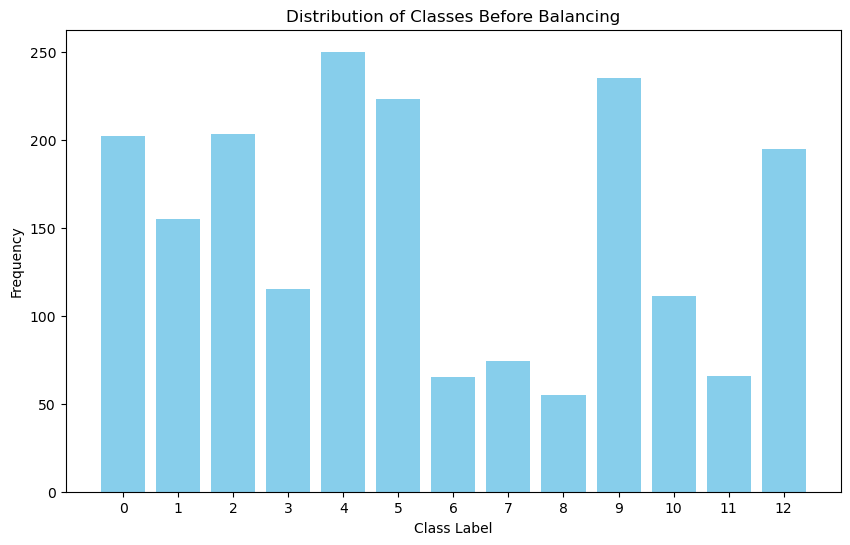

In [9]:
import numpy as np
import matplotlib.pyplot as plt

unique, counts = np.unique(Y, return_counts=True)

plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Distribution of Classes Before Balancing')
plt.xticks(unique) 
plt.show()

# Balancing the data

In [12]:
from sklearn.utils import resample

# Set the desired number of samples per class
desired_samples_per_class = 400

X_balanced = []
Y_balanced = []

# Iterate over each class
for class_label in np.unique(Y):
    # Select samples belonging to the current class
    X_class = X[Y == class_label]
    Y_class = Y[Y == class_label]

    # Check if we need to upsample, downsample, or keep the same number of samples
    if len(X_class) < desired_samples_per_class:
        # Upsample the class
        X_upsampled, Y_upsampled = resample(X_class,
                                             Y_class,
                                             replace=True,
                                             n_samples=desired_samples_per_class,
                                             random_state=123)
    elif len(X_class) > desired_samples_per_class:
        # Downsample the class
        X_downsampled, Y_downsampled = resample(X_class,
                                                 Y_class,
                                                 replace=False,
                                                 n_samples=desired_samples_per_class,
                                                 random_state=123)
        X_upsampled, Y_upsampled = X_downsampled, Y_downsampled
    else:
        # Keep the same number of samples
        X_upsampled, Y_upsampled = X_class, Y_class

    # Append the upsampled class samples to the balanced dataset
    X_balanced.append(X_upsampled)
    Y_balanced.append(Y_upsampled)

# Combine the upsampled samples from all classes
X_balanced = np.vstack(X_balanced)
Y_balanced = np.hstack(Y_balanced)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# checking the class distribution in the Y array

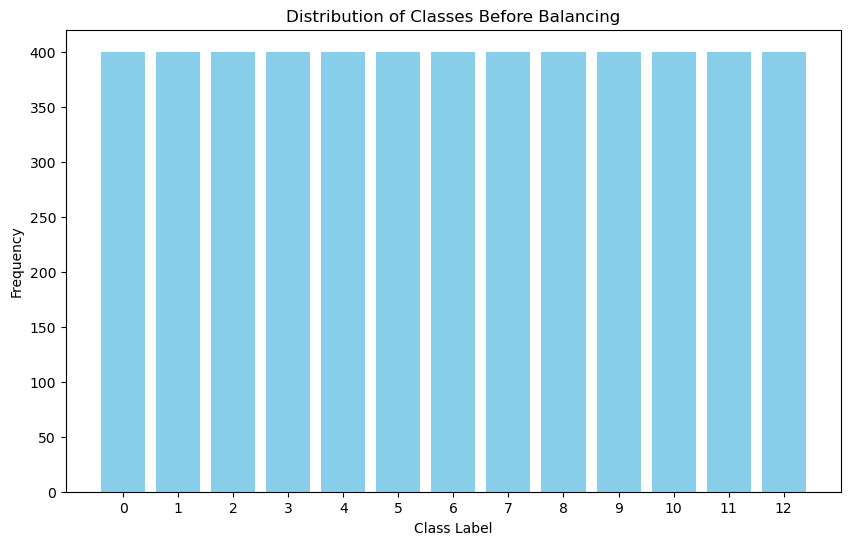

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming Y contains class labels
unique, counts = np.unique(Y_balanced, return_counts=True)

plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Distribution of Classes Before Balancing')
plt.xticks(unique) 
plt.show()

# Image augmentation

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your augmentation configuration
augmentation = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Apply augmentation only to the training data
augmented_training = augmentation.flow(X_balanced, Y_balanced, batch_size=32)


In [11]:
from tensorflow.keras import layers, models

model = models.Sequential([
    # Convolutional layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional layer 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional layer 4
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flattening the output
    layers.Flatten(),
    
    # Dropout for regularization
    layers.Dropout(0.5),
    
    # Dense layer for classification
    layers.Dense(512, activation='relu'),
    
    # Output layer
    layers.Dense(13, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 21, 21, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       6,554,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 13)                  │           6,669 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,801,613 (25.95 MB)

 Trainable params: 6,801,613 (25.95 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# model.fit(augmented_training,
#           epochs=20)  # Adjust based on your specific needs


In [16]:
# # If using an older version of TensorFlow/Keras
# model.fit(X_balanced,Y_balanced,
#                     epochs=20,
#                     validation_data=(X_test, y_test))


In [12]:
model.fit(X_train,y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.1715 - loss: 2.3754 - val_accuracy: 0.4008 - val_loss: 1.7566
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - accuracy: 0.4362 - loss: 1.6474 - val_accuracy: 0.5746 - val_loss: 1.2989
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.6461 - loss: 1.0968 - val_accuracy: 0.7354 - val_loss: 0.8631
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.7834 - loss: 0.6810 - val_accuracy: 0.7954 - val_loss: 0.6916
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.8117 - loss: 0.5649 - val_accuracy: 0.8469 - val_loss: 0.5224
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.8693 - loss: 0.3974 - val_accuracy: 0.8438 - val_loss: 0.5302
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.8953 - loss: 0.3080 - val_accuracy: 0.8908 - val_loss: 0.4067
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.9270 - loss: 0.2200 - val_accu

In [13]:
model.save(r"C:\Users\pasin\Documents\IIT\FYP\Skin Cancer Detection cnn\2024 Train\ModelFSD2.keras")

In [14]:
y_pred = model.predict(X_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 415ms/step


In [15]:
y_pred_classes = y_pred

In [16]:
y_pred


array([[4.13075547e-08, 1.69404558e-07, 1.86313926e-07, ...,
        1.06960636e-08, 2.06042072e-10, 7.55923915e-13],
       [7.45042462e-06, 4.63446595e-05, 2.27193232e-06, ...,
        2.44538228e-07, 1.57738657e-04, 9.99762475e-01],
       [2.18206148e-10, 1.43331802e-09, 3.31031025e-08, ...,
        2.35141719e-08, 8.07957434e-09, 2.56676778e-08],
       ...,
       [1.56687146e-16, 7.33892411e-20, 7.23483329e-10, ...,
        6.95498306e-20, 1.93735005e-20, 1.09061857e-25],
       [4.46992353e-31, 1.00000000e+00, 3.80714013e-18, ...,
        4.40598454e-30, 1.41158310e-37, 1.71136564e-32],
       [9.99173820e-01, 8.63420155e-06, 6.91292691e-04, ...,
        9.57189914e-05, 1.62815858e-10, 1.00271014e-10]], dtype=float32)

In [17]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [18]:
y_pred_classes

array([ 6, 12,  3, ...,  4,  1,  0], dtype=int64)

In [19]:
y_test

array([ 6, 12,  3, ...,  4,  1,  0])

Confusion Matrix:
[[101   3   8   1   4   1   0   1   0   1   2   0   0]
 [  0  85   1   0   1   0   0   0   0   1   0   0   0]
 [  2   1  96   0   2   2   0   1   5   0   2   0   0]
 [  0   2   4  93   0   0   3   0   0   0   0   0   0]
 [  0   0   0   0  89   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 104   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 109   0   0   0   0   0   0]
 [  0   0   2   0   1   0   1  98   0   0   0   0   0]
 [  0   0   1   0   0   0   0   1  86   0   0   2   0]
 [  0   0   0   0   0   0   0   0   0  88   0   0   0]
 [  0   0   5   0   0   0   4   0   0   0  97   2   0]
 [  1   1   0   0   0   1   0   1   3   0   0  75   6]
 [  0   0   0   2   0   0   0   0   0   0   0   0  97]]


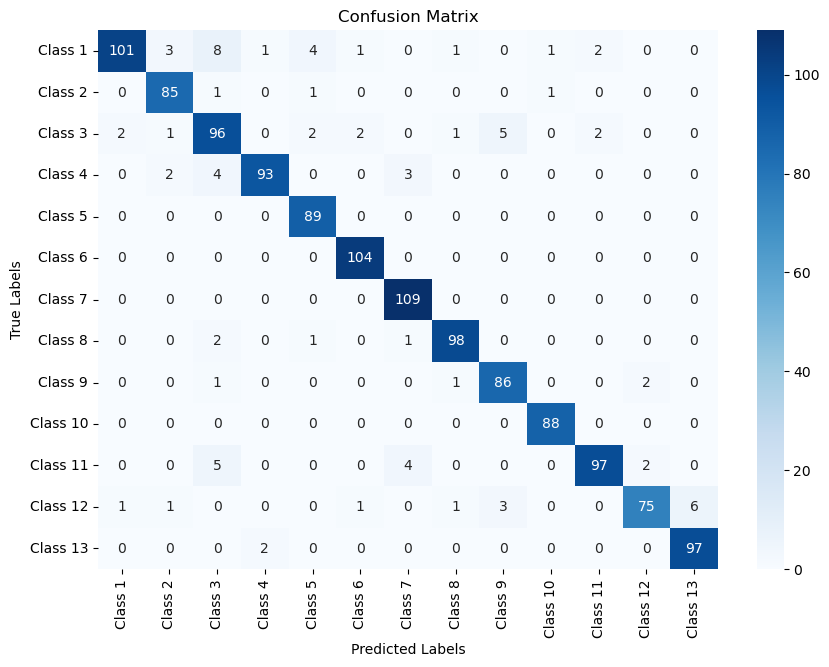

Classification Report:
              precision    recall  f1-score   support

     Class 1       0.97      0.83      0.89       122
     Class 2       0.92      0.97      0.94        88
     Class 3       0.82      0.86      0.84       111
     Class 4       0.97      0.91      0.94       102
     Class 5       0.92      1.00      0.96        89
     Class 6       0.96      1.00      0.98       104
     Class 7       0.93      1.00      0.96       109
     Class 8       0.96      0.96      0.96       102
     Class 9       0.91      0.96      0.93        90
    Class 10       0.98      1.00      0.99        88
    Class 11       0.96      0.90      0.93       108
    Class 12       0.95      0.85      0.90        88
    Class 13       0.94      0.98      0.96        99

    accuracy                           0.94      1300
   macro avg       0.94      0.94      0.94      1300
weighted avg       0.94      0.94      0.94      1300



In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



# Define target names for 13 classes
target_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 
                'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10', 
                'Class 11', 'Class 12', 'Class 13']

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Visualization of the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report for 13 Classes
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=target_names))


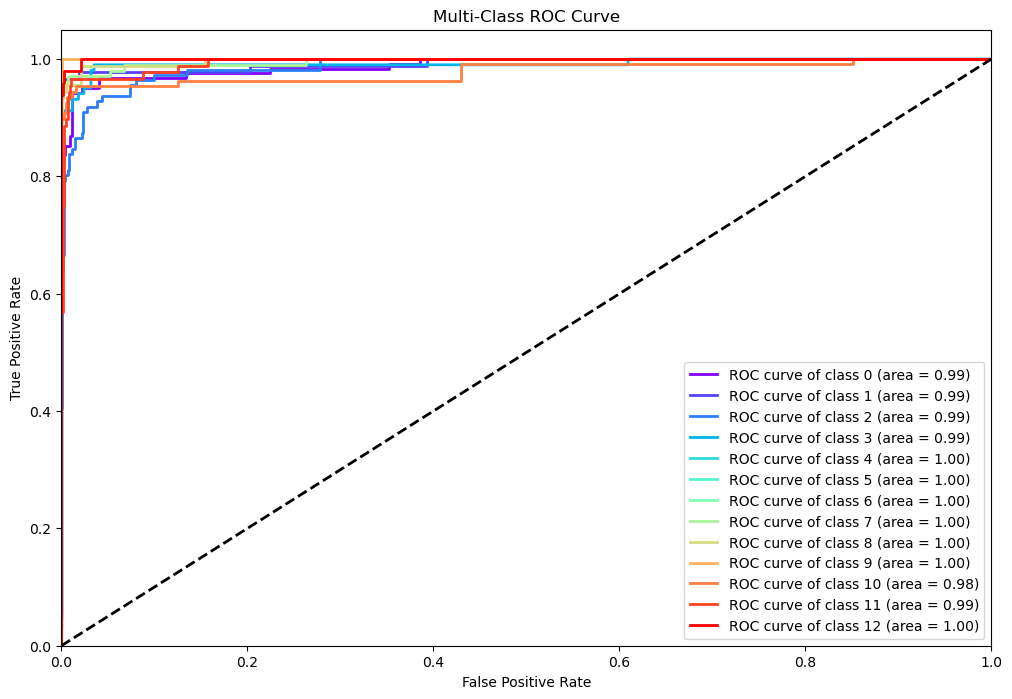

In [21]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=[*range(13)])
y_pred_binarized = y_pred  

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(13):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(12, 8))
colors = iter(plt.cm.rainbow(np.linspace(0, 1, 13)))
for i, color in zip(range(13), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc="lower right")
plt.show()


# testing

In [31]:
import cv2
randomImg = cv2.imread(r"C:\Users\pasin\Documents\IIT\FYP\Skin Cancer Detection cnn\2024 Train\Dermnet\Normal Skin\image4.jpg")

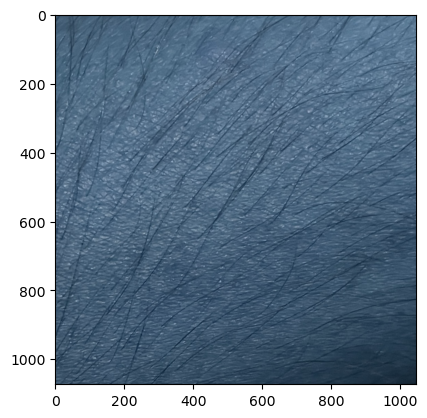

In [32]:

import matplotlib.pyplot as plt
plt.imshow(randomImg)
randomImg.shape

randomImgR = cv2.resize(randomImg, (200,200))
randomImgR = randomImgR.reshape(1,200,200,3)
# before resizing and preprocessing the test image

In [33]:
pred = model.predict(randomImgR)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [34]:
test = np.argmax(pred, axis=1)

In [35]:
test

array([7], dtype=int64)

In [36]:
print(test)

[7]
